In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
%config InlineBackend.rc = {'font.size': 10, 'figure.figsize': (10.0, 6.0), 'figure.facecolor': (1, 1, 1, 0), 'figure.subplot.bottom': 0.125, 'figure.edgecolor': (1, 1, 1, 0), 'figure.dpi': 72}

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.drop('id',axis = 1,inplace = True)
test.drop('id',axis = 1,inplace = True)


### Target

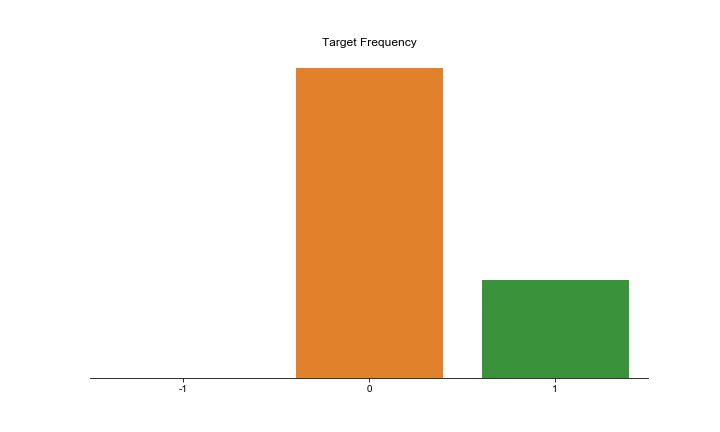

In [5]:
target_counts = train.cancel.value_counts()

fig,ax = plt.subplots()
sns.set_style('white')
sns.barplot(x = target_counts.index, y =target_counts)
sns.despine(right = 'True',top = 'True',left = 'True')
ax.set_ylabel('')
ax.set_yticks([])
ax.set_title('Target Frequency');

##### Drop target = -1

In [6]:
# Drop target = -1
print('Number of target we remove: {:,}'.format(sum(train.cancel == -1)))
train = train[train.cancel != -1]

Number of target we remove: 3,452


In [7]:
train_copy = train.copy()
test_copy = test.copy()
train_copy.drop('cancel',axis = 1,inplace = True)
train_copy['train'] = 1
test_copy['train'] = 0
all_data = pd.concat([train_copy,test_copy],axis = 0).reset_index(drop = True)

In [8]:
# all_data.reset_index(inplace = True,drop = True)
target = train.cancel
all_data_train = all_data[all_data.train == 1].drop('train',axis = 1)
all_data_test = all_data[all_data.train == 0].drop('train',axis = 1)

In [9]:
print('Shape of training: {}'.format(all_data_train.shape))
print('Length of target: {}'.format(len(target)))
print('Shape of testing: {}'.format(all_data_test.shape))

assert len(all_data_test) + len(all_data_train) == len(all_data)

Shape of training: (1045123, 16)
Length of target: 1045123
Shape of testing: (444430, 16)


In [10]:
all_data_train.describe(include = 'all')

,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
count,1.045123e+06,1.044179e+06,1044184,1.044122e+06,1.044163e+06,1044218,1044144,1044133,1.044168e+06,1044103,1044166,1.044131e+06,1.044194e+06,1.044188e+06,1.044145e+06,1.044141e+06
unique,NaN,NaN,4,NaN,NaN,3,3,3,NaN,3,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,white,NaN,NaN,high,C,House,NaN,Broker,M,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,396895,NaN,NaN,645327,438083,585953,NaN,606797,543420,NaN,NaN,NaN,NaN,NaN
mean,2.014630e+03,6.234952e+04,NaN,4.356420e+01,1.521624e+01,NaN,NaN,NaN,8.999090e+02,NaN,NaN,7.099722e-01,2.133894e+00,1.737778e+00,1.167743e+01,1.995822e-01
std,1.111147e+00,2.800600e+04,NaN,1.236386e+01,4.566267e+00,NaN,NaN,NaN,7.770291e+01,NaN,NaN,4.537751e-01,1.253962e+00,2.343018e+00,5.933028e+00,3.996865e-01
min,2.013000e+03,1.500100e+04,NaN,1.800000e+01,1.000000e+00,NaN,NaN,NaN,6.123895e+02,NaN,NaN,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.014000e+03,5.000900e+04,NaN,3.500000e+01,1.200000e+01,NaN,NaN,NaN,8.439571e+02,NaN,NaN,0.000000e+00,1.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00
50%,2.015000e+03,8.001100e+04,NaN,4.300000e+01,1.500000e+01,NaN,NaN,NaN,8.997258e+02,NaN,NaN,1.000000e+00,2.000000e+00,1.000000e+00,1.300000e+01,0.000000e+00
75%,2.016000e+03,8.503000e+04,NaN,5.100000e+01,1.800000e+01,NaN,NaN,NaN,9.554028e+02,NaN,NaN,1.000000e+00,3.000000e+00,2.000000e+00,1.600000e+01,0.000000e+00


In [11]:
all_data_test.describe()

,year,zip.code,ni.age,len.at.res,premium,ni.marital.status,n.adults,n.children,tenure,claim.ind
count,444430.0,444060.000000,444039.000000,444050.000000,444043.000000,443999.000000,444025.000000,444032.000000,444029.000000,444003.000000
mean,2017.0,62401.899133,43.605718,15.211192,900.105138,0.710970,2.134044,1.740784,12.723108,0.200445
std,0.0,27974.415775,12.421308,4.566579,77.685787,0.453312,1.254363,2.347826,5.977621,0.400334
min,2017.0,15001.000000,18.000000,1.000000,605.402219,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2017.0,50009.000000,35.000000,12.000000,844.113170,0.000000,1.000000,0.000000,7.000000,0.000000
50%,2017.0,80011.000000,43.000000,15.000000,899.976179,1.000000,2.000000,1.000000,14.000000,0.000000
75%,2017.0,85031.000000,51.000000,18.000000,955.585744,1.000000,3.000000,3.000000,17.000000,0.000000
max,2017.0,98038.000000,398.939624,49.994489,1202.637904,1.000000,11.000000,12.000000,36.000000,1.000000


### Null Value

Null value percentage: 1.37%


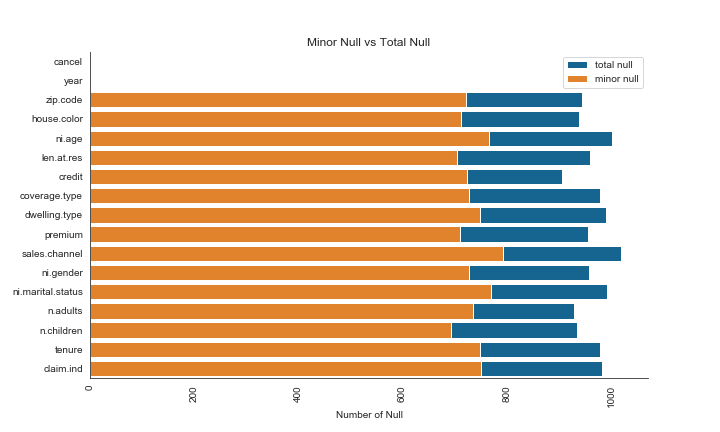

In [12]:
total_null = train.isnull().sum()
minor_null = train[train.cancel == 0].isnull().sum()

print('Null value percentage: {:.2%}'.format(1 - train.dropna().shape[0]/train.shape[0]))

fig,ax = plt.subplots()
sns.barplot(y = total_null.index,x = total_null,color = (0/255,107/255,164/255),label = 'total null')
sns.barplot(y = minor_null.index, x = minor_null,color = (255/255,128/255,14/255),label = 'minor null')
plt.xticks(rotation = 90)
sns.despine(right = 'True',top = 'True')
ax.set_title('Minor Null vs Total Null')
ax.set_xlabel('Number of Null')
plt.legend(loc = 'upper right');

### EDA

In [13]:
all_data_train.head()

,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,2013,98004.0,blue,37.0,18.000000,high,C,Tenant,950.507336,Broker,F,0.0,2.0,0.0,15.0,0.0
1,2013,85017.0,white,40.0,17.000000,medium,A,Condo,909.346046,Broker,F,1.0,5.0,0.0,15.0,0.0
2,2013,80021.0,white,45.0,14.000000,high,A,House,897.084502,Phone,M,0.0,1.0,0.0,14.0,0.0
3,2013,85002.0,red,45.0,24.366136,high,A,House,979.039007,Phone,M,0.0,5.0,0.0,22.0,1.0
4,2013,50001.0,yellow,36.0,16.000000,high,C,House,932.379027,Broker,M,1.0,2.0,4.0,4.0,0.0


In [14]:
train.dtypes

cancel                 int64
year                   int64
zip.code             float64
house.color           object
ni.age               float64
len.at.res           float64
credit                object
coverage.type         object
dwelling.type         object
premium              float64
sales.channel         object
ni.gender             object
ni.marital.status    float64
n.adults             float64
n.children           float64
tenure               float64
claim.ind            float64
dtype: object

In [15]:
numeric_col = ['ni.age','len.at.res','premium','n.adults','n.children','tenure']
cat_col = all_data_train.columns[~all_data_train.columns.isin(numeric_col)]

In [16]:
all_data_train[numeric_col].describe()

,ni.age,len.at.res,premium,n.adults,n.children,tenure
count,1.044122e+06,1.044163e+06,1.044168e+06,1.044194e+06,1.044188e+06,1.044145e+06
mean,4.356420e+01,1.521624e+01,8.999090e+02,2.133894e+00,1.737778e+00,1.167743e+01
std,1.236386e+01,4.566267e+00,7.770291e+01,1.253962e+00,2.343018e+00,5.933028e+00
min,1.800000e+01,1.000000e+00,6.123895e+02,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.500000e+01,1.200000e+01,8.439571e+02,1.000000e+00,0.000000e+00,6.000000e+00
50%,4.300000e+01,1.500000e+01,8.997258e+02,2.000000e+00,1.000000e+00,1.300000e+01
75%,5.100000e+01,1.800000e+01,9.554028e+02,3.000000e+00,2.000000e+00,1.600000e+01
max,4.024009e+02,4.999854e+01,1.243311e+03,1.200000e+01,1.200000e+01,3.400000e+01


In [17]:
all_data_test[numeric_col].describe()

,ni.age,len.at.res,premium,n.adults,n.children,tenure
count,444039.000000,444050.000000,444043.000000,444025.000000,444032.000000,444029.000000
mean,43.605718,15.211192,900.105138,2.134044,1.740784,12.723108
std,12.421308,4.566579,77.685787,1.254363,2.347826,5.977621
min,18.000000,1.000000,605.402219,1.000000,0.000000,1.000000
25%,35.000000,12.000000,844.113170,1.000000,0.000000,7.000000
50%,43.000000,15.000000,899.976179,2.000000,1.000000,14.000000
75%,51.000000,18.000000,955.585744,3.000000,3.000000,17.000000
max,398.939624,49.994489,1202.637904,11.000000,12.000000,36.000000


### Numerical Varible

##### Year

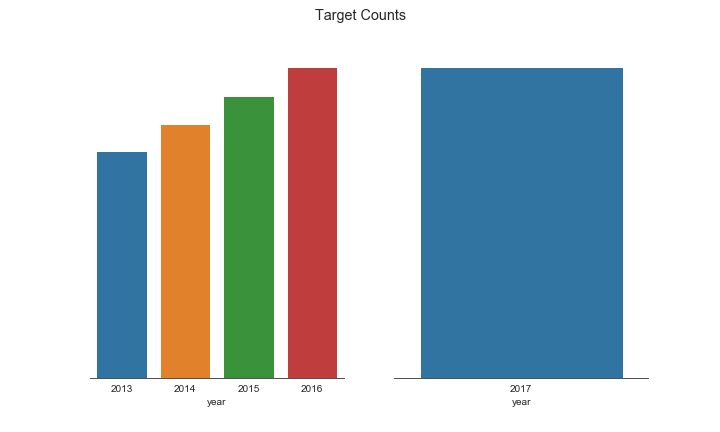

In [18]:
fig = plt.figure()
fig.suptitle("Target Counts", fontsize="x-large")

for i,data in enumerate([all_data_train,all_data_test]):
    ax = fig.add_subplot(1,2,i+1)
    sns.countplot(data.year)
    sns.despine(right = 'True',top = 'True',left = 'True')
    ax.set_ylabel('')
    ax.set_yticks([])

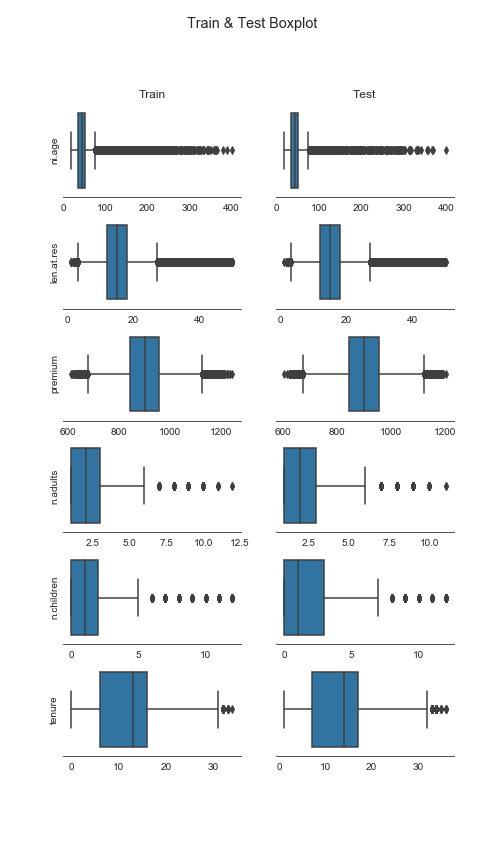

In [19]:
fig = plt.figure(figsize = (7,12))
fig.suptitle("Train & Test Boxplot", fontsize="x-large")
titles = ['Train','Test']

index = 0
for col in numeric_col:
    for data,title in zip([all_data_train,all_data_test],titles):
        ax = fig.add_subplot(len(numeric_col),2,index +1)
        sns.boxplot(data[col])
        sns.despine(right = 'True',top = 'True',left = 'True')
        ax.set_xlabel('')
        ax.set_yticks([])
        if index %2 == 0:
            ax.set_ylabel(col)
        
        if index in [0,1]:
            ax.set_title(title)
        index +=1

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


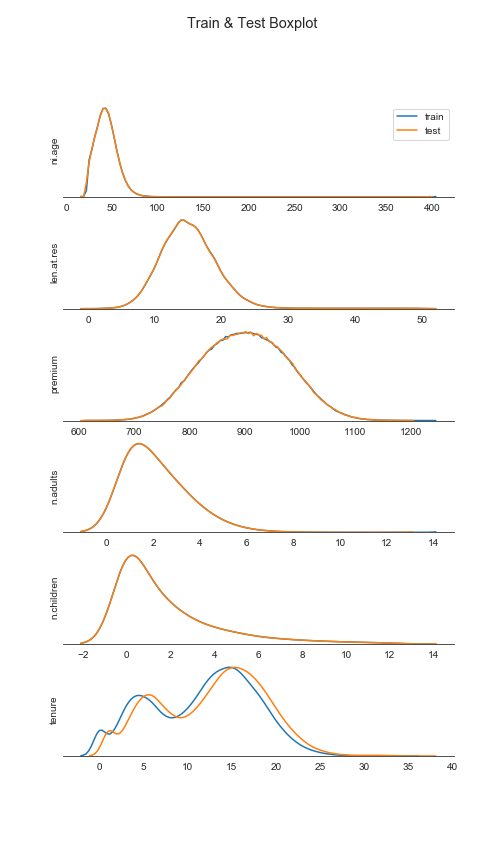

In [20]:
fig = plt.figure(figsize = (7,12))
fig.suptitle("Train & Test Boxplot", fontsize="x-large")

index = 0
for col in numeric_col:
    ax = fig.add_subplot(len(numeric_col),1,index +1)
    sns.kdeplot(all_data_train[col],bw = 0.7,label ='train',legend = False)
    sns.kdeplot(all_data_test[col],bw = 0.7,label = 'test',legend = False)

    sns.despine(right = 'True',top = 'True',left = 'True')
    ax.set_yticks([])
    ax.set_ylabel(col)
    if index == 0:
        plt.legend()
            
    index += 1

### Age

- The min age for both train and test set are 18.
- From the boxplot above, we can see there are outliers, which are beyond 100.
- Training and testing has similar Age distribution

In [21]:
Age_threshold = 100

print('Number of outliers of ni.age in train: {}'.format(np.sum(all_data_train['ni.age'] > Age_threshold)))
print('Number of outliers of ni.age in test: {}'.format(np.sum(all_data_test['ni.age'] > Age_threshold)))

Number of outliers of ni.age in train: 863
Number of outliers of ni.age in test: 369


##### Solution: convert outliers to NA

In [22]:
all_data.loc[all_data['ni.age'] > Age_threshold,'ni.age'] = np.nan

Age null rate:0.18%


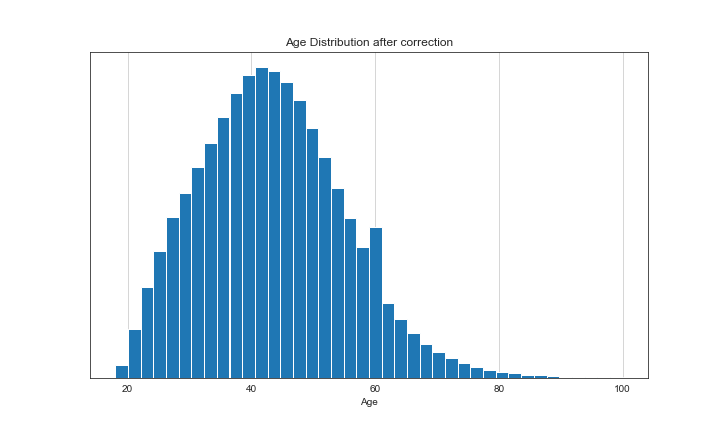

In [23]:
plt.figure()
all_data['ni.age'].hist(bins = 40)
plt.title('Age Distribution after correction')
plt.xlabel('Age')
plt.yticks([])


print('Age null rate:{:.2%}'.format(all_data['ni.age'].isnull().sum()/len(all_data)))

##### Cut age

In [24]:
def age_group(df):
    bins = (17,25,50,100)
    group_names = ['Young Adult','Adult','Senior']
    categories = pd.cut(df['ni.age'], bins, labels=group_names)
    df['age.range'] = categories
    return df

# age_group(all_data).head()

### Length at residence

It's impossible to have length of residence > age, so we convert these value to be null.

In [25]:
all_data.loc[all_data['len.at.res'] > all_data['ni.age'],'len.at.res'] = np.nan

print('Length of residence null rate:{:.2%}'.format(all_data['len.at.res'].isnull().sum()/len(all_data)))

Length of residence null rate:0.57%


In [26]:
def len_of_resid_group(df):
    bins = (-1,10,15,20,100)
    group_names = ['below 10','11-15','16-20','20+']
    categories = pd.cut(df['len.at.res'], bins, labels=group_names)
    df['len.at.res.range'] = categories
    return df

###### Premium

In [27]:
all_data.premium.describe()

count    1.488211e+06
mean     8.999675e+02
std      7.769783e+01
min      6.054022e+02
25%      8.440045e+02
50%      8.997993e+02
75%      9.554601e+02
max      1.243311e+03
Name: premium, dtype: float64

Premium seems like annual premium.

### n.adults

In [28]:
all_data['n.adults'].value_counts()

1.0     604345
2.0     403630
3.0     268074
4.0     134288
5.0      53366
6.0      17798
7.0       5014
8.0       1341
9.0        299
10.0        52
11.0        10
12.0         2
Name: n.adults, dtype: int64

In [29]:
all_data[all_data['n.adults'] == 12]

,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind,train
672043,2016,80016.0,blue,52.0,10.0,high,A,House,895.848290,Broker,M,1.0,12.0,0.0,18.0,0.0,1
807894,2016,50021.0,white,52.0,10.0,low,C,House,780.092094,Broker,M,1.0,12.0,3.0,11.0,0.0,1


##### Cut n.adults

In [30]:
def n_adult_group(df):
    bins = (-1,1,2,5,13)
    group_names = ['one','two','3-5','above 6']
    categories = pd.cut(df['n.adults'], bins, labels=group_names)
    df['n.adults.range'] = categories
    return df

# n_adult_group(all_data).head()

### n.children

##### cut n.children

In [31]:
def n_children_group(df):
    bins = (-1,0,3,13)
    group_names = ['No Child','1-3','Above 4']
    categories = pd.cut(df['n.children'], bins, labels=group_names)
    df['n.children.range'] = categories
    return df

# n_children_group(all_data).head()

### tenure

Tenure can not be larger than age, we convert those value to be NA

In [32]:
all_data.loc[all_data['tenure'] > all_data['ni.age'],'tenure'] = np.nan

print('Tenure null rate:{:.2%}'.format(all_data['tenure'].isnull().sum()/len(all_data)))

Tenure null rate:0.10%


In [33]:
all_data['tenure'].value_counts().sort_index().head(10)

0.0    33307
1.0    24409
2.0    30457
3.0    53943
4.0    71384
5.0    74855
6.0    67357
7.0    54747
8.0    46552
9.0    45602
Name: tenure, dtype: int64

In [34]:
all_data['tenure'].value_counts().sort_index().tail(10)

27.0    1329
28.0     697
29.0     365
30.0     346
31.0     296
32.0     205
33.0     116
34.0      39
35.0       5
36.0       5
Name: tenure, dtype: int64

##### Cut tenure

In [35]:
def tenure_group(df):
    bins = (-1,5,10,15,20,40)
    group_names = ['below 5','6-10','11-15','16-20','above 20']
    categories = pd.cut(df['tenure'], bins, labels=group_names)
    df['tenure.range'] = categories
    return df

# tenure_group(all_data).head()

##### Numerical feature encoding

In [36]:
def numerical_feature_encoding(df):
    df = age_group(df)
    df = len_of_resid_group(df)
    df = n_adult_group(df)
    df = n_children_group(df)
    df = tenure_group(df)
    
#     df.drop(['ni.age','len.at.res','n.adults','n.children','tenure'],axis = 1,inplace = True)
    
    return df
all_data = numerical_feature_encoding(all_data)

In [37]:
all_data.head()

,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,...,n.adults,n.children,tenure,claim.ind,train,age.range,len.at.res.range,n.adults.range,n.children.range,tenure.range
0,2013,98004.0,blue,37.0,18.000000,high,C,Tenant,950.507336,Broker,...,2.0,0.0,15.0,0.0,1,Adult,16-20,two,No Child,11-15
1,2013,85017.0,white,40.0,17.000000,medium,A,Condo,909.346046,Broker,...,5.0,0.0,15.0,0.0,1,Adult,16-20,3-5,No Child,11-15
2,2013,80021.0,white,45.0,14.000000,high,A,House,897.084502,Phone,...,1.0,0.0,14.0,0.0,1,Adult,11-15,one,No Child,11-15
3,2013,85002.0,red,45.0,24.366136,high,A,House,979.039007,Phone,...,5.0,0.0,22.0,1.0,1,Adult,20+,3-5,No Child,above 20
4,2013,50001.0,yellow,36.0,16.000000,high,C,House,932.379027,Broker,...,2.0,4.0,4.0,0.0,1,Adult,16-20,two,Above 4,below 5


## Feature generating

- Family size = n.children + n.adult  -> large,medium, small family size
- more_children = n.children > n.adult

### Family size

In [38]:
all_data['family_size'] = all_data['n.adults'] + all_data['n.children']

In [39]:
all_data['family_size'].value_counts()

2.0     291104
3.0     273390
1.0     249675
4.0     210391
5.0     148221
6.0     101143
7.0      67343
8.0      45228
9.0      31479
10.0     22137
11.0     16421
12.0     12089
13.0      9120
14.0      5045
15.0      2488
16.0      1082
17.0       370
18.0       128
19.0        26
20.0         7
21.0         2
Name: family_size, dtype: int64

##### Family size encoding

In [40]:
def family_size_encoding(df):
    df.loc[df['family_size'] == 1,'family_size_encoding'] = 'live_alone'
    df.loc[(all_data['family_size'] == 2) & (all_data['n.children'] == 0),'family_size_encoding'] = 'couple with no kid'
    df.loc[(all_data['family_size'] == 2) & (all_data['n.children'] != 0),'family_size_encoding'] = 'couple with kids'
    df.loc[(df['family_size'] >= 3) & (df['family_size'] <= 6) 
           & (df['n.children'] >= df['n.adults']),'family_size_encoding'] = 'regular size family with more kids'
    df.loc[(df['family_size'] >= 3) & (df['family_size'] <= 6) 
           & (df['n.children'] < df['n.adults']),'family_size_encoding'] = 'regular size family with more adults'
    df.loc[df['family_size'] >6,'family_size_encoding'] = 'large size family'
    
    return df

In [41]:
all_data = family_size_encoding(all_data)

##### More_children

In [42]:
all_data['More_children'] = np.where(all_data['n.children'] >= all_data['n.adults'],1,0)

In [43]:
all_data['More_children'].value_counts()

0    884280
1    605273
Name: More_children, dtype: int64

In [44]:
all_data.head()

,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,...,claim.ind,train,age.range,len.at.res.range,n.adults.range,n.children.range,tenure.range,family_size,family_size_encoding,More_children
0,2013,98004.0,blue,37.0,18.000000,high,C,Tenant,950.507336,Broker,...,0.0,1,Adult,16-20,two,No Child,11-15,2.0,couple with no kid,0
1,2013,85017.0,white,40.0,17.000000,medium,A,Condo,909.346046,Broker,...,0.0,1,Adult,16-20,3-5,No Child,11-15,5.0,regular size family with more adults,0
2,2013,80021.0,white,45.0,14.000000,high,A,House,897.084502,Phone,...,0.0,1,Adult,11-15,one,No Child,11-15,1.0,live_alone,0
3,2013,85002.0,red,45.0,24.366136,high,A,House,979.039007,Phone,...,1.0,1,Adult,20+,3-5,No Child,above 20,5.0,regular size family with more adults,0
4,2013,50001.0,yellow,36.0,16.000000,high,C,House,932.379027,Broker,...,0.0,1,Adult,16-20,two,Above 4,below 5,6.0,regular size family with more kids,1


## Categorical Columns 

### Zip code -> States

In [45]:
zipcode = pd.read_csv('zipcode.csv')

zipcode = zipcode[['STATE','zipcode']]
zipcode.drop_duplicates(inplace = True)

In [46]:
all_data = all_data.merge(zipcode,left_on = 'zip.code',right_on = 'zipcode',how = 'left')
all_data.drop('zipcode',axis = 1,inplace = True)

In [47]:
all_data.STATE.value_counts()

IA    318620
CO    228429
PA    217316
AZ    177860
WA    151631
VA     44879
Name: STATE, dtype: int64

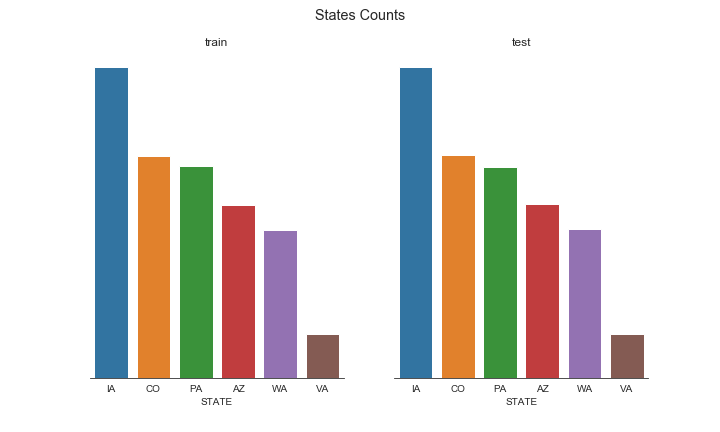

In [48]:
fig = plt.figure()
fig.suptitle("States Counts", fontsize="x-large")
titles = ['train','test']

for i,data in enumerate([all_data[all_data['train'] == 1],all_data[all_data['train'] == 0]]):
    ax = fig.add_subplot(1,2,i+1)
    sns.countplot(data.STATE,order = all_data.STATE.value_counts().index)
    sns.despine(right = 'True',top = 'True',left = 'True')
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.set_title(titles[i])

In [49]:
plt_cat_col = cat_col[2:]

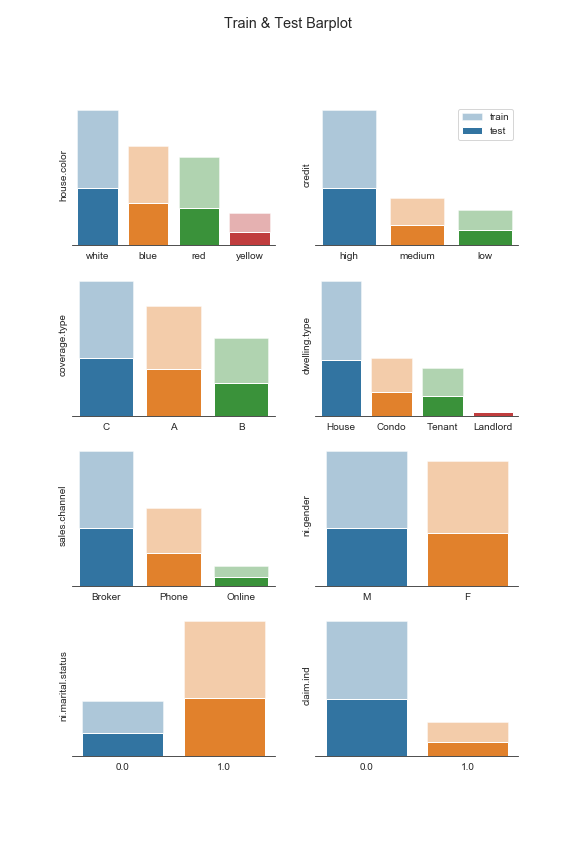

In [50]:
fig = plt.figure(figsize = (8,12))
fig.suptitle("Train & Test Barplot", fontsize="x-large")

index = 0
for col in plt_cat_col:
    ax = fig.add_subplot(4,2,index +1)
    value_count_train = all_data_train[col].value_counts()
    value_count_test = all_data_test[col].value_counts()
    
    sns.barplot(x = value_count_train.index,y = value_count_train,label ='train',alpha = 0.4)
    sns.barplot(x = value_count_test.index, y = value_count_test,label = 'test')

    sns.despine(right = 'True',top = 'True',left = 'True')
    ax.set_yticks([])
#     ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel(col)
    if index == 1:
        plt.legend()
            
    index += 1

# plt.legend()

### dwelling.type encoding ?

In [51]:
all_data.loc[(all_data['dwelling.type'].isnull()) | (all_data['dwelling.type'] == 'Landlord'),'dwelling.type'] = 'Other'

In [52]:
all_data['dwelling.type'].value_counts(dropna = False)

House     826302
Condo     353708
Tenant    291844
Other      17699
Name: dwelling.type, dtype: int64

### Drop ni.age, len.at.res, n.adults, n.children, tenure, year, zip.code

In [53]:
all_data.drop(['ni.age','len.at.res','n.adults','n.children','tenure','year','zip.code'],axis = 1,inplace = True)

In [54]:
all_data

,house.color,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,claim.ind,train,age.range,len.at.res.range,n.adults.range,n.children.range,tenure.range,family_size,family_size_encoding,More_children,STATE
0,blue,high,C,Tenant,950.507336,Broker,F,0.0,0.0,1,Adult,16-20,two,No Child,11-15,2.0,couple with no kid,0,WA
1,white,medium,A,Condo,909.346046,Broker,F,1.0,0.0,1,Adult,16-20,3-5,No Child,11-15,5.0,regular size family with more adults,0,AZ
2,white,high,A,House,897.084502,Phone,M,0.0,0.0,1,Adult,11-15,one,No Child,11-15,1.0,live_alone,0,CO
3,red,high,A,House,979.039007,Phone,M,0.0,1.0,1,Adult,20+,3-5,No Child,above 20,5.0,regular size family with more adults,0,NaN
4,yellow,high,C,House,932.379027,Broker,M,1.0,0.0,1,Adult,16-20,two,Above 4,below 5,6.0,regular size family with more kids,1,IA
5,white,high,A,House,930.727924,Phone,M,1.0,0.0,1,Senior,16-20,one,1-3,16-20,3.0,regular size family with more kids,1,PA
6,blue,medium,A,Condo,1045.507170,Broker,F,1.0,0.0,1,Adult,11-15,two,1-3,below 5,5.0,regular size family with more kids,1,AZ
7,blue,high,A,Condo,895.230584,Broker,F,0.0,0.0,1,Adult,16-20,one,No Child,6-10,1.0,live_alone,0,IA
8,white,medium,C,Tenant,950.436126,Broker,M,1.0,0.0,1,Adult,below 10,one,1-3,6-10,2.0,couple with kids,1,NaN
9,red,high,C,House,803.719895,Broker,M,0.0,0.0,1,Adult,16-20,two,1-3,11-15,3.0,regular size family with more adults,0,PA


### Varibale v.s Target

In [55]:
train_copy = all_data.loc[all_data['train'] == 1].copy()
train_copy['cancel'] = target
train_copy.drop('train',axis = 1,inplace = True)

In [56]:
train_copy.head()

,house.color,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,claim.ind,age.range,len.at.res.range,n.adults.range,n.children.range,tenure.range,family_size,family_size_encoding,More_children,STATE,cancel
0,blue,high,C,Tenant,950.507336,Broker,F,0.0,0.0,Adult,16-20,two,No Child,11-15,2.0,couple with no kid,0,WA,0.0
1,white,medium,A,Condo,909.346046,Broker,F,1.0,0.0,Adult,16-20,3-5,No Child,11-15,5.0,regular size family with more adults,0,AZ,0.0
2,white,high,A,House,897.084502,Phone,M,0.0,0.0,Adult,11-15,one,No Child,11-15,1.0,live_alone,0,CO,0.0
3,red,high,A,House,979.039007,Phone,M,0.0,1.0,Adult,20+,3-5,No Child,above 20,5.0,regular size family with more adults,0,NaN,0.0
4,yellow,high,C,House,932.379027,Broker,M,1.0,0.0,Adult,16-20,two,Above 4,below 5,6.0,regular size family with more kids,1,IA,0.0


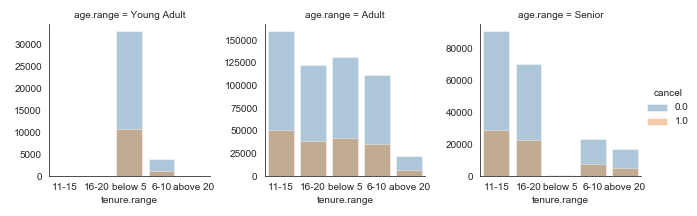

In [57]:
g = sns.FacetGrid(train_copy,col = 'age.range',hue = 'cancel',sharey = False)
g.map(sns.countplot,'tenure.range',alpha = 0.4,order = train_copy['tenure.range'].value_counts().index).add_legend()
# sns.despine(left = True,bottom = True)


### One-hot-encoding

In [58]:
all_data_dummies = pd.get_dummies(all_data)
train_copy_dummies = pd.get_dummies(train_copy)

In [59]:
train_copy_dummies.shape

(1045123, 56)

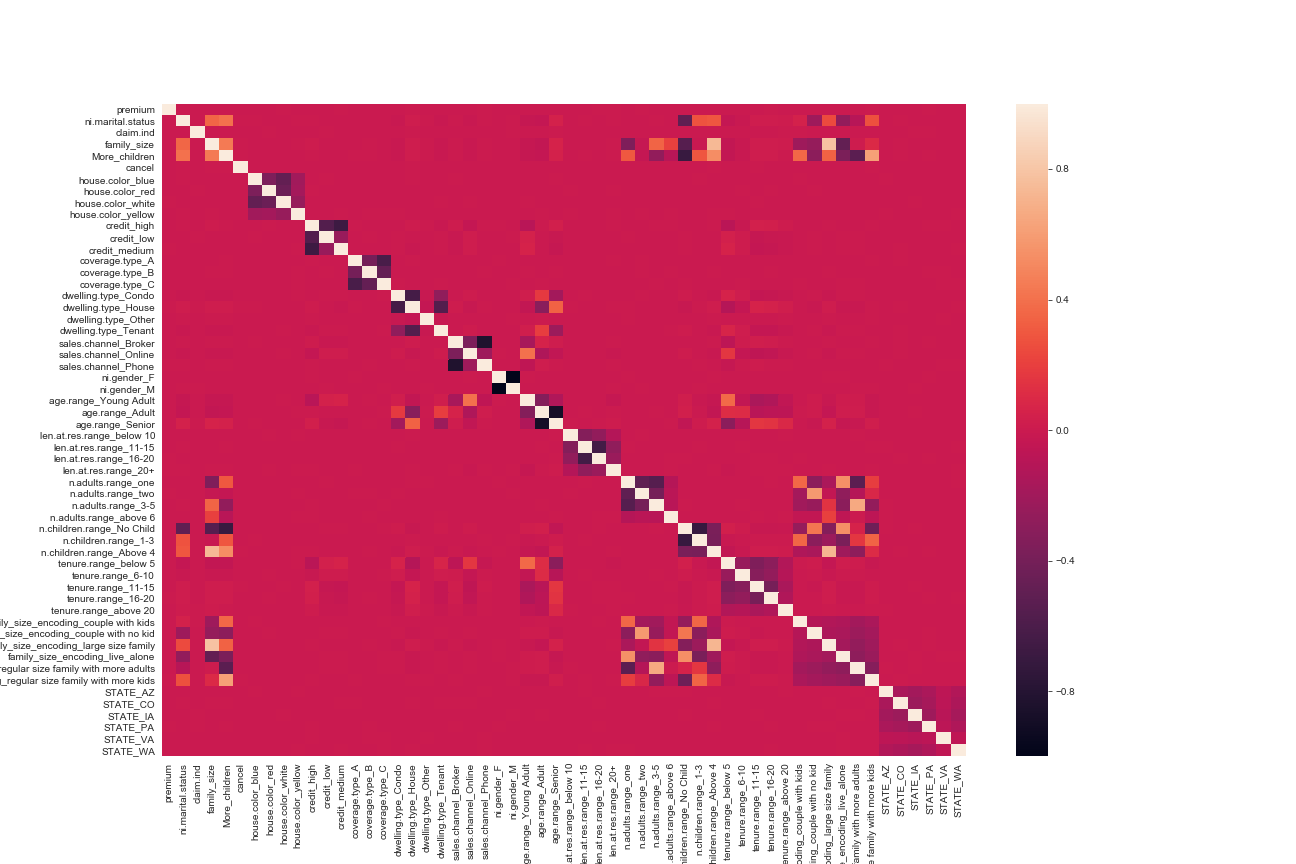

In [60]:
plt.figure(figsize = (18,12))
sns.heatmap(train_copy_dummies.corr()) 

In [61]:
train_copy_dummies.corr().loc[:,'cancel'].sort_values()

dwelling.type_Tenant                                        -1.642576e-03
STATE_CO                                                    -1.505891e-03
n.children.range_No Child                                   -1.374667e-03
tenure.range_16-20                                          -1.306467e-03
coverage.type_A                                             -1.100320e-03
age.range_Adult                                             -9.021855e-04
n.adults.range_two                                          -8.651351e-04
family_size_encoding_couple with no kid                     -8.445058e-04
tenure.range_above 20                                       -8.165391e-04
credit_high                                                 -7.372912e-04
STATE_VA                                                    -5.820455e-04
family_size_encoding_regular size family with more adults   -5.382268e-04
claim.ind                                                   -4.252721e-04
house.color_red                       

There are no linear relationship between each variable with target.

### Train validation spilt

In [62]:
from sklearn.model_selection import train_test_split

# train_dummies_no_na = train_copy_dummies.dropna()

# y = train_dummies_no_na['cancel']
# X = train_dummies_no_na.drop('cancel',axis = 1)



In [63]:
# drop cancel is null
train_copy1 = train_copy[~train_copy['cancel'].isnull()]
train_copy1_dummies = pd.get_dummies(train_copy1,dummy_na = True)

train_copy1_dummies.isnull().sum()
train_copy1_dummies.fillna(train_copy1_dummies.mean(),inplace = True)

y = train_copy1_dummies['cancel']
X = train_copy1_dummies.drop('cancel',axis = 1)

In [64]:
train_copy1_dummies.corr().loc[:,'cancel'].sort_values()

dwelling.type_Tenant                                        -0.001643
STATE_CO                                                    -0.001506
tenure.range_nan                                            -0.001462
n.children.range_No Child                                   -0.001375
tenure.range_16-20                                          -0.001306
coverage.type_A                                             -0.001100
age.range_Adult                                             -0.000902
house.color_nan                                             -0.000895
n.adults.range_two                                          -0.000865
family_size_encoding_couple with no kid                     -0.000845
tenure.range_above 20                                       -0.000817
credit_high                                                 -0.000737
STATE_VA                                                    -0.000582
family_size_encoding_regular size family with more adults   -0.000538
claim.ind           

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Baseline

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


# Create the RFE object and compute a cross-validated score.
gbm = GradientBoostingClassifier()
rf = RandomForestClassifier(n_jobs=-1)
lr = LogisticRegression(n_jobs=-1,class_weight = 'balanced')
# The "accuracy" scoring is proportional to the number of correct
# classifications

rfecv = RFECV(rf, step=0.5, cv=StratifiedKFold(2), scoring = 'roc_auc',
              n_jobs = -1)
rfecv.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
   min_features_to_select=1, n_jobs=-1, scoring='roc_auc', step=0.5,
   verbose=0)

Optimal number of features : 34


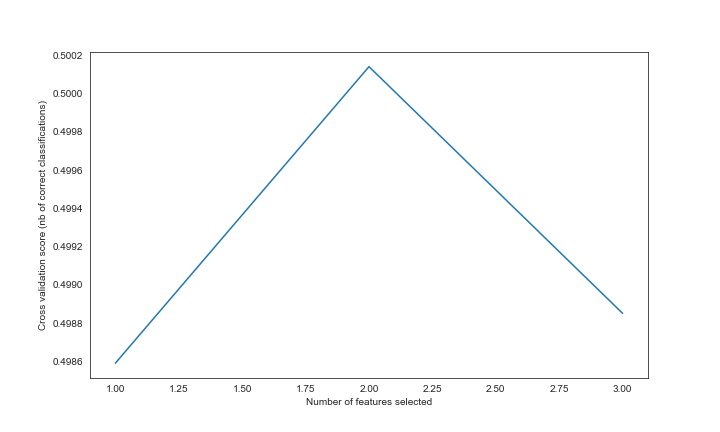

In [66]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [67]:
train_copy1_dummies.shape

(1041679, 69)

In [68]:
rfecv.grid_scores_

array([0.49859092, 0.50014044, 0.49885127])

### Undersampling

In [69]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=123)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [70]:
rfecv = RFECV(rf, step=0.5, cv=StratifiedKFold(2), scoring = 'roc_auc',
              n_jobs = -1)
rfecv.fit(X_resampled, y_resampled)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
   min_features_to_select=1, n_jobs=-1, scoring='roc_auc', step=0.5,
   verbose=0)

Optimal number of features : 68


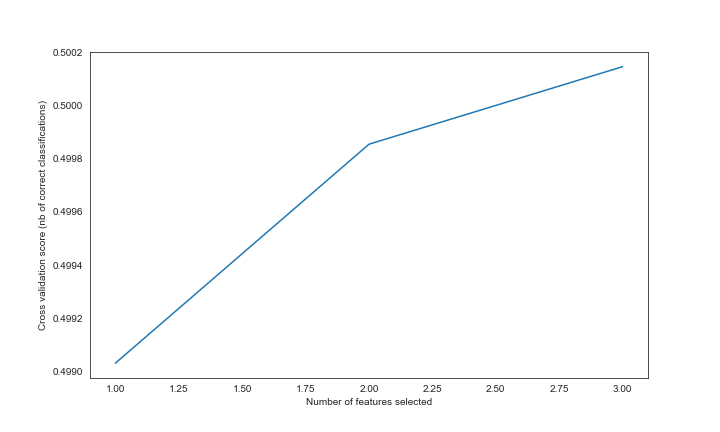

In [71]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [72]:
rfecv.grid_scores_

array([0.49903152, 0.49985425, 0.50014559])

### Oversampling: SMOTE

In [74]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)

classifier = RandomForestClassifier

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=42), classifier(random_state=42,n_jobs = -1))

smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [75]:
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, roc_auc_score
from collections import Counter

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_sample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))


def print_results(headline, true_value, pred):
    print(headline)
    print("AUC: {}".format(roc_auc_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))
    
print("Confusion Matrix: ")
print(confusion_matrix(y_test, smote_prediction))

print('\nSMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))

print_results("\nSMOTE + RandomForest classification", y_test, smote_prediction)

normal data distribution: Counter({0.0: 789341, 1.0: 252338})
SMOTE data distribution: Counter({0.0: 789341, 1.0: 789341})
Confusion Matrix: 
[[145960  11828]
 [ 46679   3869]]

SMOTE Pipeline Score 0.7191699946240688

SMOTE + RandomForest classification
AUC: 0.5007898844538324
precision: 0.24648021915015608
recall: 0.07654110944053177
f2: 0.08878373850905737


In [77]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=42), classifier())

smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

In [78]:
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, roc_auc_score
from collections import Counter

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_sample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))


def print_results(headline, true_value, pred):
    print(headline)
    print("AUC: {}".format(roc_auc_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))
    
print("Confusion Matrix: ")
print(confusion_matrix(y_test, smote_prediction))

print('\nSMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))

print_results("\nSMOTE + NB classification", y_test, smote_prediction)

normal data distribution: Counter({0.0: 789341, 1.0: 252338})
SMOTE data distribution: Counter({0.0: 789341, 1.0: 789341})
Confusion Matrix: 
[[ 20467 137321]
 [  6646  43902]]

SMOTE Pipeline Score 0.30896724521926117

SMOTE + RandomForest classification
AUC: 0.49911651419563446
precision: 0.24225401852965683
recall: 0.8685210097333228
f2: 0.5725128124877744


### PCA

In [94]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
pca_result_2 = pca_2.fit(X)

In [95]:
pca_result_2.explained_variance_ratio_

array([0.99735528, 0.00123278])

In [97]:
X_pca = pca_result_2.transform(X)

### Select a subset

In [111]:
_, X_sub, _, y_sub = train_test_split(X_pca, y, test_size=0.01, random_state=111)

### Run T-SNE to see whether it's seperable

In [112]:
import matplotlib.patheffects as PathEffects
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [113]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_sub)
X_embedded.shape

(10417, 2)

(<Figure size 576x576 with 1 Axes>,
 [Text(1.105997, -0.043541633, '0'), Text(-0.29322213, 0.5904181, '1')])

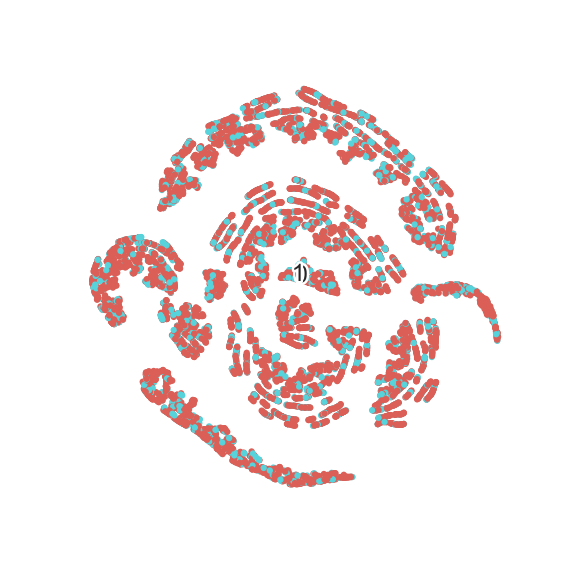

In [114]:
fashion_scatter(X_embedded, y_sub)